In [1]:
import zipfile
import os
import warnings
warnings.filterwarnings('ignore')

# File path for the uploaded zip file
zip_file_path = 'individual+household+electric+power+consumption.zip'
extract_folder_path = 'household_power_consumption'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

# Listing the files extracted
extracted_files = os.listdir(extract_folder_path)
extracted_files

['household_power_consumption.txt']

In [2]:
import pandas as pd

# File path of the extracted data
data_file_path = os.path.join(extract_folder_path, 'household_power_consumption.txt')


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'data_file_path' is the path to your CSV file
data = pd.read_csv(data_file_path, sep=';')
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Convert data to numeric and handle missing values (impute or drop)
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

# Feature selection - select relevant columns
features = data.drop(['Global_active_power', 'Datetime'], axis=1)
target = data['Global_active_power']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 0.03260927388323318


In [5]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)

gbm_rmse = mean_squared_error(y_test, gbm_predictions, squared=False)
print(f"GBM RMSE: {gbm_rmse}")

GBM RMSE: 0.03432207499277312


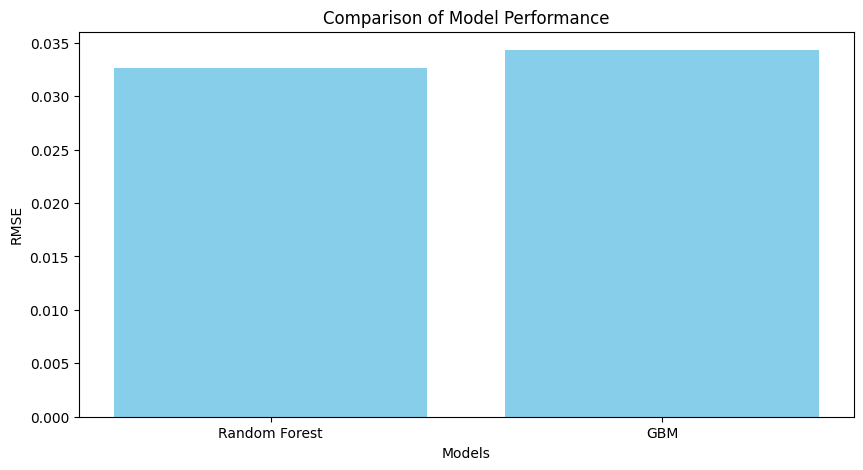

In [6]:
import matplotlib.pyplot as plt

# Comparing RMSE values
rmse_values = [rf_rmse, gbm_rmse]
model_names = ['Random Forest', 'GBM']

plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of Model Performance')
plt.show()